# Part II - (Prosper Loan Dataset)
## by (Ibukun Racheal Olaseile)


## Investigation Overview


> One of my main focus for the project was what determines the outcome of the BorrowerAPR, so I explored some variables e.g the LoanOriginalAmount, ProsperRating and Term.  There was a negative correlation between the BorrowerAPR and the LoanOriginalAmont, what this implies is that the more loan you acquire, the lower your APR but interestingly when other factors e.g the Term of loan and ProsperRating are involved, the BorrowerAPR might increase.

## Dataset Overview

> The dataset used in this report is Prosper Loan Data, Prosper is a california based company that issues loan to borrowers at a low interest rate. I will be using the various python libraries (Numpy, Pandas, Matplotlib and seaborn ) for exploration and explanation analysis. The various data visualizations made in this project will help me futher understand my dataset.


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv ('prosperLoanData.csv')
# Convert ProsperRating and Employment status into ordered categorical types
rate_order = ['HR','E','D','C','B','A','AA']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = rate_order)
df['ProsperRating (Alpha)'] = df['ProsperRating (Alpha)'].astype(ordered_var)

emp_order = ['Employed','Self-employed','Full-time','Part-time','Retired','Other','Not employed', 'Not available']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = emp_order)
df['EmploymentStatus'] = df['EmploymentStatus'].astype(ordered_var)

## (Visualization 1)

>The major goal for this project is to find out factors that determine the BorrowerAPR, I will exploring the distribution of the BorrowerAPR first.


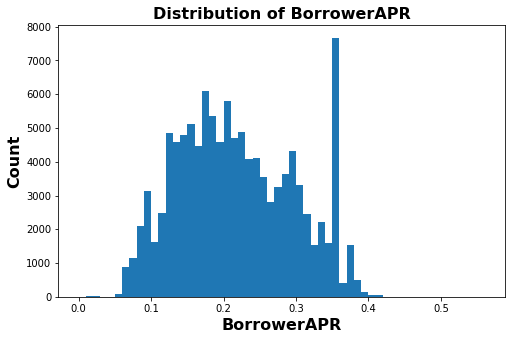

In [4]:
#Finding the distribution of BorrowerAPR
bins = np.arange(0,df.BorrowerAPR.max()+0.05, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(df['BorrowerAPR'].dropna().values, bins = bins)
plt.title('Distribution of BorrowerAPR', fontsize = 16, weight = 'bold')
plt.xlabel('BorrowerAPR',fontsize = 16, weight = 'bold')
plt.ylabel('Count',fontsize = 16, weight = 'bold')
plt.show()

From the chart above, the distribution for the BorrowerAPR is multimodal, ie there are various peaks of the APR with the highest being recorded between 0.35 and 0.36

## (Visualization 2)

> The next exploration is finding out the relationship between the BorrowerAPR and LoanOriginalAmount

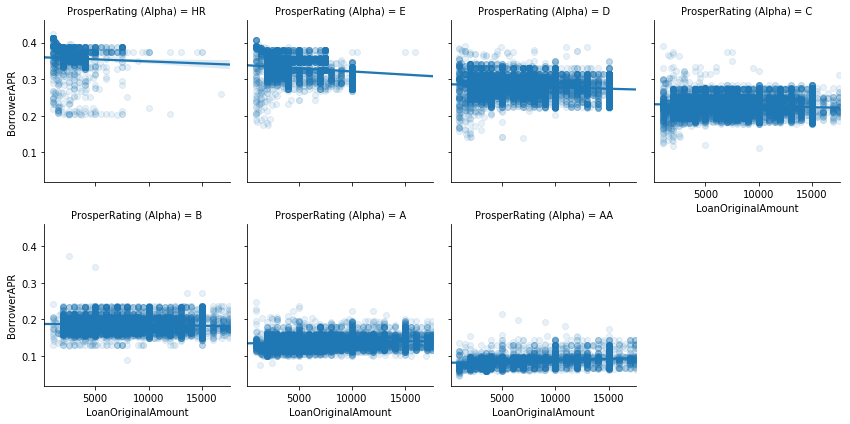

In [8]:
# Prosper rating effect on relationship of APR and loanOriginalamount
g=sb.FacetGrid(data=df, col='ProsperRating (Alpha)', col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});



There is a negative correlation between the LoanOriginalAmount and BorrowerAPR, this implies that as the Loan amount increases, the BorrowerAPR decreases.

## (Visualization 3)
My last exploration will be to determine what these variables (Term and ProsperRating) has on the relationship between BorrowerAPR and LoanOriginalAmount


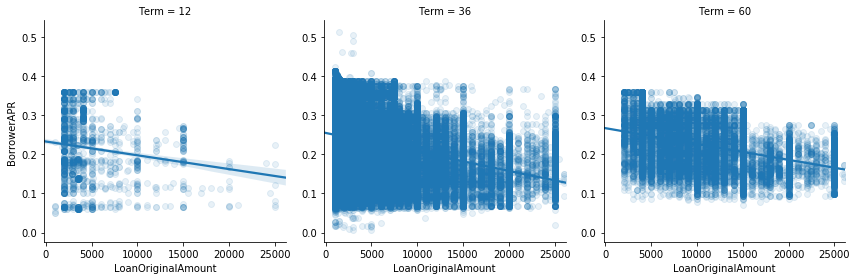

In [9]:
# Term effect on relationship of BorrowerAPR and LoanOriginalamount
g = sb.FacetGrid(data = df, col = 'Term', size = 4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR',x_jitter = 0.03,scatter_kws={'alpha':0.1});

The Loan Term doesnt affect the relationship between the BorrowerAPR and LoanOriginalAmount as the correlation among them remains the same across all terms


# Visualization 4

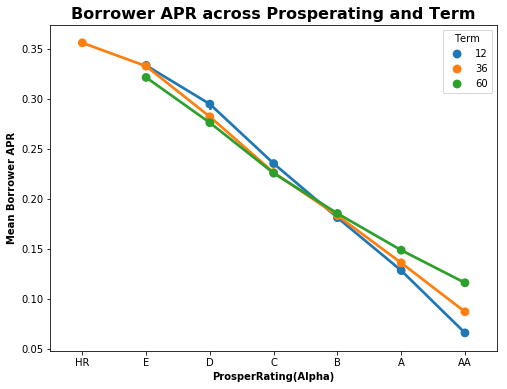

In [7]:
plt.figure(figsize = [8,6])

ax = sb.pointplot(data = df, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'Term')
plt.title('Borrower APR across Prosperating and Term',Fontsize = 16, weight = 'bold')
plt.ylabel('Mean Borrower APR',weight = 'bold')
plt.xlabel ('ProsperRating(Alpha)', weight = 'bold')
ax.set_yticklabels([],minor = True);
plt.show();

As seen on the last chart, the BorrowerAPR can change depending on the Term or ProsperRating.The BorrowerAPR decreases as the term increases for ProsperRating between (HR-C) while there was an Increament in the BorrowerAPR for ProsperRating (B-AA)

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 596104 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 